In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [472]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
print(torch.__version__)

0.4.0


In [4]:
import pydicom
import glob
import os
import numpy
import seaborn as sns
from itertools import chain
from pathlib import Path

In [5]:
PATH = "./"
SPECTPATH = Path("../data/PPMISPECT/")

In [6]:
lstFilesDCM = []  # create an empty list
'''for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))'''

'for dirName, subdirList, fileList in os.walk(PathDicom):\n    for filename in fileList:\n        if ".dcm" in filename.lower():  # check whether the file\'s DICOM\n            lstFilesDCM.append(os.path.join(dirName,filename))'

In [7]:
metadata = pd.read_csv(f'{PATH}PPMI.csv')

In [8]:
metadata[0:5]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,388628,4140,Control,M,76,0,SPECT,Reconstructed DaTSCAN,Processed,4/09/2013,DCM,5/27/2018
1,388627,4139,Control,M,81,0,SPECT,Reconstructed DaTSCAN,Processed,3/19/2013,DCM,5/27/2018
2,388626,4137,PD,M,70,0,SPECT,Reconstructed DaTSCAN,Processed,4/02/2013,DCM,5/27/2018
3,388625,4136,PD,M,56,0,SPECT,Reconstructed DaTSCAN,Processed,2/13/2013,DCM,5/27/2018
4,451290,4135,PD,M,68,5,SPECT,Reconstructed DaTSCAN,Processed,2/18/2014,DCM,5/27/2018


In [9]:
#Shuffle data
metadata = metadata.sample(frac=1).reset_index(drop=True)

In [10]:
metadata[0:5]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,360618,3769,Control,M,71,0,SPECT,Reconstructed DaTSCAN,Processed,10/25/2012,DCM,5/27/2018
1,388617,4122,PD,M,64,0,SPECT,Reconstructed DaTSCAN,Processed,2/06/2013,DCM,5/27/2018
2,363956,3870,PD,F,41,0,SPECT,Reconstructed DaTSCAN,Processed,11/29/2012,DCM,5/27/2018
3,388601,4107,PD,M,71,0,SPECT,Reconstructed DaTSCAN,Processed,12/21/2012,DCM,5/27/2018
4,419581,3829,PD,F,68,5,SPECT,Reconstructed DaTSCAN,Processed,10/01/2013,DCM,5/27/2018


In [11]:
for file in glob.glob(f'{PATH}PPMI*/**/Reconstructed_DaTSCAN/**/**/*.dcm'):
    lstFilesDCM.append(file)

In [12]:
len(lstFilesDCM)

1569

In [13]:
ptID = []
for i in lstFilesDCM:
    j = i.split("_")[13].strip()
    j = int(j[1:7])
    ptID.append(j)
len(ptID)

1569

In [14]:
p ={}
for o in ptID:
    for k in metadata.iloc[:,0]:
        if o == k:
            p[o] = metadata.loc[metadata['Image Data ID'] == k, 'Group'].tolist()[0]
len(p)

1569

In [15]:
df = metadata[['Image Data ID','Group','Subject','Age','Sex']].set_index('Image Data ID')
for index, rows in df.iterrows():
    for i in lstFilesDCM:
        j = i.split("_")[13].strip()
        j = int(j[1:7])
        if index == j:
            df.loc[df.index == j, "Filenames"] = i


In [163]:
#Check duplicate item
bg = []
for i in lstFilesDCM:
    for index, rows in df.iterrows():
        j = i.split("_")[13].strip()
        j = int(j[1:7])
        if j == index:
            bg.append(index)
print( [item for item, count in collections.Counter(bg).items() if count > 1] )
            

In [16]:
lstFilesDCM = df['Filenames'].values

In [17]:
lstFilesDCM = lstFilesDCM.tolist()

In [18]:
df.sample(frac=0.2, axis=0)

,Group,Subject,Age,Sex,Filenames
Image Data ID,,,,,
388578,Control,3969,80,F,./PPMI 9/3969/Reconstructed_DaTSCAN/2013-02-20...
767696,PD,3307,70,M,./PPMI 4/3307/Reconstructed_DaTSCAN/2015-11-05...
913228,PD,4109,71,M,./PPMI 4/4109/Reconstructed_DaTSCAN/2017-02-24...
418920,PD,3504,63,M,./PPMI 9/3504/Reconstructed_DaTSCAN/2013-01-23...
418669,PD,3307,67,M,./PPMI 2/3307/Reconstructed_DaTSCAN/2012-11-07...
360624,PD,4101,67,F,./PPMI 2/4101/Reconstructed_DaTSCAN/2012-11-14...
360615,PD,3633,69,F,./PPMI 3/3633/Reconstructed_DaTSCAN/2012-11-01...
342171,PD,3020,74,F,./PPMI 5/3020/Reconstructed_DaTSCAN/2012-03-27...
355210,PD,3473,55,F,./PPMI 3/3473/Reconstructed_DaTSCAN/2012-08-15...


In [19]:
up = pd.read_csv('comandfile.csv')

In [20]:
up.head()

,Image Data ID,Group,Filenames,TOTAL3,1YR,2YR,3YR,TOTAL3.1
0,688484,PD,./PPMI 5/3108/Reconstructed_DaTSCAN/2015-05-07...,10.500000,18.00,25.0,NaN,10.500000
1,446117,PD,./PPMI/3308/Reconstructed_DaTSCAN/2014-02-12_1...,19.666667,25.00,20.5,27.0,19.666667
2,446109,PD,./PPMI 9/3173/Reconstructed_DaTSCAN/2014-03-19...,24.500000,30.50,38.0,49.0,24.500000
3,341084,PD,./PPMI 8/3951/Reconstructed_DaTSCAN/2011-09-28...,14.000000,17.75,18.0,10.5,14.000000
4,363942,PD,./PPMI/3027/Reconstructed_DaTSCAN/2012-11-28_1...,26.000000,22.25,22.0,17.5,26.000000


In [21]:
up_df = up[['Image Data ID','TOTAL3','1YR','2YR','3YR','TOTAL3']].set_index('Image Data ID')

In [22]:
df1to4 = df.join(up_df)

In [23]:
df1to4 = df1to4.dropna(axis=0,subset=(['1YR']))

In [222]:
df1to4.to_csv('comandfile.csv')

In [6]:
df1to4 = pd.read_csv('comandfile.csv')

In [7]:
df1to4 = df1to4[~df1to4.Group.str.contains('Control')]

In [8]:
df1to4 = df1to4[~df1to4.TOTAL3.isnull()]

In [9]:
df1to4.any().isnull()

Unnamed: 0       False
Image Data ID    False
Group            False
Subject          False
Age              False
Sex              False
Filenames        False
TOTAL3           False
1YR              False
2YR              False
3YR              False
TOTAL3.1         False
dtype: bool

In [10]:
df1to4.loc[df1to4['Sex']=='F', 'Sex']=0
df1to4.loc[df1to4['Sex']=='M', 'Sex']=1

### Binary Classification

In [11]:
pro = (df1to4['1YR'].values - df1to4['TOTAL3'].values)
progress = []

for i in pro:
    if i > 2 : progress.append('1')
    else : progress.append('0')
df1to4['Progress'] = progress
df1to4['pro'] = pro
del(pro,progress)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scale3 = MinMaxScaler()

In [14]:
print(scale3.fit(df1to4['TOTAL3'].values.reshape(-1,1)))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [15]:
df1to4['3scale'] = scale3.transform(df1to4['TOTAL3'].values.reshape(-1,1))

In [16]:
del(scale3)

In [17]:
from sklearn.model_selection import train_test_split
X_train_tmp, X_test_tmp, param_train_tmp, param_test_tmp, y_train_tmp, y_test_tmp = train_test_split(df1to4, df1to4[['Sex','Age','TOTAL3']], df1to4['Progress'], test_size=0.2)

from sklearn.model_selection import train_test_split
X_train_tmp, X_val_tmp, param_train_tmp, param_val_tmp, y_train_tmp, y_val_tmp = train_test_split(X_train_tmp, param_train_tmp, y_train_tmp, test_size=0.3)

In [18]:
lstFilesDCM_train = []  # create an empty list
lstFilesDCM_test = []
lstFilesDCM_val = []
lstFilesDCM_train = X_train_tmp['Filenames'].values
lstFilesDCM_train = lstFilesDCM_train.tolist()
lstFilesDCM_test = X_test_tmp['Filenames'].values
lstFilesDCM_test = lstFilesDCM_test.tolist()
lstFilesDCM_val = X_val_tmp['Filenames'].values
lstFilesDCM_val = lstFilesDCM_val.tolist()

For NORMAL Image

In [16]:
#Training Set

In [432]:
# loop through all the DICOM files
image_array_39_train =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(str(SPECTPATH / filenameDCM))
    # store the raw image data
    image_array_39_train.append(ds.pixel_array[39])
    image_array_39_train.append(ds.pixel_array[39][:,::-1])
    #For debug corrupted image
    #print(np.asarray(image_array_39_train).shape)

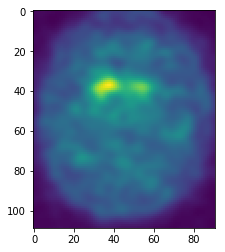

In [433]:
plt.imshow(np.asarray(image_array_39_train)[256])

In [434]:
# loop through all the DICOM files
image_array_40_train =[]

#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(str(SPECTPATH / filenameDCM))
    # store the raw image data
    image_array_40_train.append(ds.pixel_array[40])
    image_array_40_train.append(ds.pixel_array[40][:,::-1])
    #For debug corrupted image
    #print(np.asarray(image_array_40_train).shape)

In [435]:
# loop through all the DICOM files
image_array_41_train =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(str(SPECTPATH / filenameDCM))
    # store the raw image data
    image_array_41_train.append(ds.pixel_array[41])
    image_array_41_train.append(ds.pixel_array[41][:,::-1])
    #For debug corrupted image
    #print(np.asarray(image_array_41_train).shape)

In [478]:
#Stack up to made RGB, so we can use pretrain model
image_array_train = np.vstack((np.stack((np.asarray(image_array_39_train)/5000, np.asarray(image_array_39_train)/25000, image_array_39_train),axis=1),
                         np.stack((np.asarray(image_array_40_train)/5000, np.asarray(image_array_40_train)/25000, image_array_40_train),axis=1),
                         np.stack((np.asarray(image_array_41_train)/5000, np.asarray(image_array_41_train)/25000, image_array_41_train),axis=1)))

In [ ]:
# del(image_array_39_train, image_array_40_train, image_array_41_train)

In [32]:
#Validation set

In [480]:
'''# loop through all the DICOM files
image_array_39_val =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_val:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_39_val.append(ds.pixel_array[39])
    #For debug corrupted image
    #print(np.asarray(image_array_39_train).shape)'''

# loop through all the DICOM files
image_array_40_val =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_val:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(str(SPECTPATH / filenameDCM))
    # store the raw image data
    image_array_40_val.append(ds.pixel_array[40])
    #For debug corrupted image
    #print(np.asarray(image_array_40_train).shape)

'''# loop through all the DICOM files
image_array_41_val =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_val:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_41_val.append(ds.pixel_array[41])
    #For debug corrupted image
    #print(np.asarray(image_array_41_train).shape)'''

#Stack up to made RGB, so we can use pretrain model
'''image_array_val = np.vstack((
    np.stack([image_array_39_val, image_array_39_val, image_array_39_val], axis=3),
    np.stack([image_array_40_val, image_array_40_val, image_array_40_val], axis=3),
    np.stack([image_array_41_val, image_array_41_val, image_array_41_val], axis=3)))'''

image_array_val = np.stack((np.asarray(image_array_40_val)/5000, np.asarray(image_array_40_val)/25000, image_array_40_val),axis=1)
                         
#del(image_array_40_val)
image_array_val.shape

(294, 3, 109, 91)

In [34]:
#Test set

In [481]:
'''# loop through all the DICOM files
image_array_39_test =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_test:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_39_test.append(ds.pixel_array[39])
    #For debug corrupted image
    #print(np.asarray(image_array_39_train).shape)'''

# loop through all the DICOM files
image_array_40_test =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_test:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(str(SPECTPATH / filenameDCM))
    # store the raw image data
    image_array_40_test.append(ds.pixel_array[40])
    #For debug corrupted image
    #print(np.asarray(image_array_40_train).shape)

'''# loop through all the DICOM files
image_array_41_test =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_test:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_41_test.append(ds.pixel_array[41])
    #For debug corrupted image
    #print(np.asarray(image_array_41_train).shape)'''

'''#Stack up to made RGB, so we can use pretrain model
image_array_test = np.vstack((
    np.stack([image_array_39_test, image_array_39_test, image_array_39_test], axis=3),
    np.stack([image_array_40_test, image_array_40_test, image_array_40_test], axis=3),
    np.stack([image_array_41_test, image_array_41_test, image_array_41_test], axis=3)))'''

image_array_test = np.stack((np.asarray(image_array_40_test)/5000, np.asarray(image_array_40_test)/25000, image_array_40_test),axis=1)

image_array_test.shape

(245, 3, 109, 91)

In [466]:
#Check matched data-result by Image ID number
lstFilesDCM_test[0:5]

['./PPMI7/3507/Reconstructed_DaTSCAN/2012-02-22_14_56_19.0/S146384/PPMI_3507_NM_Reconstructed_DaTSCAN_Br_20130206130756657_1_S146384_I358130.dcm',
 './PPMI8/4058/Reconstructed_DaTSCAN/2012-06-27_12_44_01.0/S159742/PPMI_4058_NM_Reconstructed_DaTSCAN_Br_20121105131846286_1_S159742_I343884.dcm',
 './PPMI4/4030/Reconstructed_DaTSCAN/2014-01-22_13_27_13.0/S215559/PPMI_4030_NM_Reconstructed_DaTSCAN_Br_20140409151037601_1_S215559_I419596.dcm',
 './PPMI7/3166/Reconstructed_DaTSCAN/2013-09-19_14_12_26.0/S215945/PPMI_3166_NM_Reconstructed_DaTSCAN_Br_20140411094253345_1_S215945_I419856.dcm',
 './PPMI4/3014/Reconstructed_DaTSCAN/2012-12-13_14_52_53.0/S196699/PPMI_3014_NM_Reconstructed_DaTSCAN_Br_20140402100002315_1_S196699_I418466.dcm']

In [467]:
X_test_tmp[0:5]

,Unnamed: 0,Image Data ID,Group,Subject,Age,Sex,Filenames,TOTAL3,1YR,2YR,3YR,TOTAL3.1,Progress,pro,3scale
1389,1389,358130,PD,3507,63,1,./PPMI7/3507/Reconstructed_DaTSCAN/2012-02-22_...,18.0,19.00,25.0,33.0,18.0,0,1.00,0.211921
69,69,343884,PD,4058,62,1,./PPMI8/4058/Reconstructed_DaTSCAN/2012-06-27_...,35.0,41.25,48.0,50.5,35.0,1,6.25,0.437086
144,144,419596,PD,4030,76,1,./PPMI4/4030/Reconstructed_DaTSCAN/2014-01-22_...,39.5,47.00,49.0,31.0,39.5,1,7.50,0.496689
429,429,419856,PD,3166,61,1,./PPMI7/3166/Reconstructed_DaTSCAN/2013-09-19_...,35.5,36.00,34.5,26.0,35.5,0,0.50,0.443709
212,212,418466,PD,3014,69,1,./PPMI4/3014/Reconstructed_DaTSCAN/2012-12-13_...,32.0,35.50,44.0,NaN,32.0,1,3.50,0.397351


In [468]:
y_train = np.asarray(y_train_tmp.values)
y_train = np.hstack((y_train,y_train,y_train))
y_train = np.hstack((y_train,y_train))
y_train = y_train.astype('int64')
y_val = np.asarray(y_val_tmp.values)
y_val = y_val.astype('int64')
#y_val= np.hstack((y_val,y_val,y_val))
y_test = np.asarray(y_test_tmp.values)
y_test = y_test.astype('int64')
#y_val= np.hstack((y_val,y_val,y_val))

In [469]:
y_train.shape,y_val.shape,y_test.shape

((4110,), (294,), (245,))

### Load dataset

In [221]:
def conv_layer(ni, nf, ks=3, stride=1):
    return nn.Sequential(
        nn.Conv2d(ni, nf, kernel_size=ks, bias=False, stride=stride, padding=ks//2),
        nn.BatchNorm2d(nf, momentum=0.01),
        nn.LeakyReLU(negative_slope=0.1, inplace=False))

class ResLayer(nn.Module):
    def __init__(self, ni):
        super().__init__()
        self.conv1=conv_layer(ni, ni//2, ks=1)
        self.conv2=conv_layer(ni//2, ni, ks=3)
        
    def forward(self, x): return x.add_(self.conv2(self.conv1(x)))

class Darknet(nn.Module):
    def make_group_layer(self, ch_in, num_blocks, stride=1):
        return [conv_layer(ch_in, ch_in*2,stride=stride)
               ] + [(ResLayer(ch_in*2)) for i in range(num_blocks)]

    def __init__(self, num_blocks, num_classes, nf=32):
        super().__init__()
        #Weight init Kaiming's
        for m in self.modules():
            if isinstance(m, nn.Conv3d):
                m.weight = nn.init.kaiming_normal(m.weight, mode='fan_out')
            elif isinstance(m, nn.BatchNorm3d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
        features = [conv_layer(3, nf, ks=3, stride=1)]
        for i,nb in enumerate(num_blocks):
            features += self.make_group_layer(nf, nb, stride=2-(i==1))
            nf *= 2                        
        features += [nn.AdaptiveAvgPool2d(1),Flatten()]        
        self.features = nn.Sequential(*features)
        self.layers = nn.Sequential(nn.Linear(1024,1))
        
    def forward(self, x):
        print(x.size())
        x = self.features(x)
        return self.layers(x)

In [222]:
wd=1e-6

In [487]:
image_array_trabn.shape

(4110, 3, 109, 91)

In [591]:
tfms_from_stats()

([<fastai.transforms.Scale object at 0x7fad8cea17f0>, <fastai.transforms.RandomRotate object at 0x7fadab4ad278>, <fastai.transforms.RandomLighting object at 0x7fadab4ad2e8>, <fastai.transforms.RandomFlip object at 0x7fadab4ad320>, <fastai.transforms.RandomCrop object at 0x7fad8cea1390>, <fastai.transforms.Normalize object at 0x7fad8cea1cc0>, <fastai.transforms.ChannelOrder object at 0x7fad8cea1630>],
 [<fastai.transforms.Scale object at 0x7fad8cea1eb8>, <fastai.transforms.CenterCrop object at 0x7fad8cea1588>, <fastai.transforms.Normalize object at 0x7fad8cea1cc0>, <fastai.transforms.ChannelOrder object at 0x7fad8cea1d68>])

In [604]:
arch=resnet50
bs=128
sz=101
#tfms = tfms_from_model(resnet50, sz)
tfms = tfms_from_stats([image_array_train.mean(),image_array_train.std()],sz=sz,aug_tfms=transforms_side_on, crop_type=CropType.CENTER)
data = ImageClassifierData.from_arrays('.', trn=(image_array_train,y_train), val=(image_array_val,y_val), test=image_array_test)

#### Learn

In [627]:
learn = ConvLearner.pretrained(arch,data, precompute=True, ps=0.7)
#lrf=learn.lr_find()

In [628]:
#learn.crit = nn.BCELoss()
#learn.opt_fn = optim.Adam

In [629]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 3, 3]),
                           ('output_shape', [-1, 64, 2, 2]),
                           ('trainable', False),
                           ('nb_params', tensor(9408))])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 2, 2]),
                           ('output_shape', [-1, 64, 2, 2]),
                           ('trainable', False),
                           ('nb_params', tensor(128))])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 2, 2]),
                           ('output_shape', [-1, 64, 2, 2]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 2, 2]),
                           ('output_shape', [-1, 64, 1, 1]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 1, 1]),
          

In [630]:
lrf=learn.lr_find()

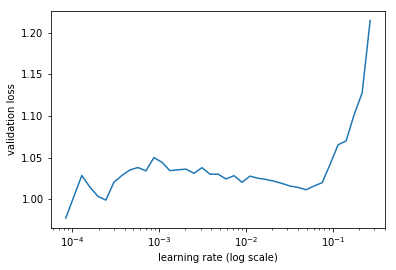

In [631]:
learn.sched.plot()

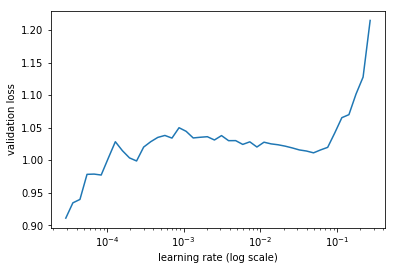

In [632]:
learn.sched.plot(n_skip=5, n_skip_end=5)

In [635]:
learn.fit(5e-4, 100)

epoch      trn_loss   val_loss   accuracy                  
    0      0.708492   0.69383    0.486395  
    1      0.709127   0.694682   0.517007                  
    2      0.70641    0.690313   0.52381                   
    3      0.70415    0.695951   0.530612                  
    4      0.699113   0.70556    0.510204                  
    5      0.697139   0.691403   0.513605                  
    6      0.697472   0.693429   0.493197                  
    7      0.699269   0.687571   0.517007                  
    8      0.69879    0.686024   0.530612                  
    9      0.696308   0.697583   0.503401                  
    10     0.694213   0.696734   0.5                       
    11     0.689538   0.689641   0.510204                  
    12     0.687291   0.69484    0.517007                  
    13     0.689638   0.693095   0.517007                  
    14     0.689808   0.696826   0.47619                   
    15     0.692761   0.699664   0.489796               

KeyboardInterrupt: 

In [636]:
learn.precompute=False

In [637]:
learn.fit(0.1, 10, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                 
    0      1.577887   0.774791   0.55102   
    1      1.416234   0.711136   0.5                      
    2      1.084471   0.695481   0.506803                 
    3      0.899432   0.698515   0.486395                  
    4      0.803286   0.698365   0.517007                  
    5      0.739494   0.68617    0.540816                  
    6      0.715199   0.697395   0.520408                  
    7      0.706667   0.700414   0.472789                  
    8      0.7061     0.687671   0.537415                  
    9      0.699138   0.691074   0.496599                  


[0.6910735121389635, 0.4965986414831512]

In [638]:
lr = 1e-4
lrs = np.array([lr/9,lr/3,lr])

In [559]:
lrf=learn.lr_find()

 95%|█████████▌| 62/65 [00:27<00:01,  2.28it/s, loss=1.66] 

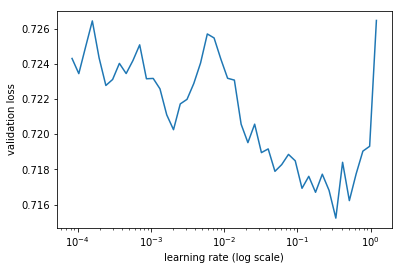

In [560]:
learn.sched.plot()

In [639]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)

epoch      trn_loss   val_loss   accuracy                  
    0      0.699166   0.692794   0.530612  
    1      0.696301   0.693177   0.510204                  
    2      0.697845   0.690166   0.537415                  
    3      0.698834   0.690428   0.527211                  
    4      0.699443   0.687412   0.534014                  
    5      0.699085   0.688621   0.52381                   
    6      0.69457    0.689908   0.517007                  
    7      0.693827   0.688183   0.506803                  
    8      0.692563   0.688845   0.527211                  
    9      0.694023   0.688676   0.520408                  
    10     0.691846   0.690238   0.510204                  
    11     0.691557   0.688793   0.520408                  
    12     0.694093   0.688574   0.517007                  


[0.6885740250146308, 0.5170068027210885]

In [626]:
learn.lr_find2

<bound method Learner.lr_find2 of Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), str

In [ ]:
learn.save(f'{sz}')

In [640]:
learn.predict()

array([[-0.57108, -0.83222],
       [-0.64614, -0.74247],
       [-0.63328, -0.75682],
       [-0.64389, -0.74495],
       [-0.62084, -0.7711 ],
       [-0.65709, -0.73056],
       [-0.61631, -0.77638],
       [-0.64471, -0.74406],
       [-0.61321, -0.78003],
       [-0.66252, -0.72475],
       [-0.65482, -0.733  ],
       [-0.62908, -0.7616 ],
       [-0.59332, -0.80405],
       [-0.61591, -0.77686],
       [-0.58048, -0.82014],
       [-0.52587, -0.89414],
       [-0.66834, -0.71859],
       [-0.6763 , -0.71029],
       [-0.62041, -0.77159],
       [-0.59718, -0.79931],
       [-0.65623, -0.73148],
       [-0.64507, -0.74365],
       [-0.67017, -0.71666],
       [-0.62552, -0.76569],
       [-0.58421, -0.81541],
       [-0.67662, -0.70996],
       [-0.65896, -0.72855],
       [-0.59244, -0.80515],
       [-0.55763, -0.84995],
       [-0.51492, -0.91018],
       [-0.67172, -0.71504],
       [-0.65349, -0.73444],
       [-0.56803, -0.83618],
       [-0.60684, -0.78761],
       [-0.669

## Validate